In [1]:
%pylab
%matplotlib inline
import scanpy as sc
import umap

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
sc.set_figure_params(dpi=100)
sc.settings.verbosity=2

In [3]:
adata = sc.datasets.pbmc3k_processed()

try downloading from url
https://raw.githubusercontent.com/chanzuckerberg/cellxgene/main/example-dataset/pbmc3k.h5ad
... this may take a while but only happens once


  0%|          | 0.00/23.5M [00:00<?, ?B/s]

In [4]:
# I usually set this
n_neighbors = int(np.sqrt(adata.shape[0])/2)
print(n_neighbors, adata.uns['neighbors']['params']['n_neighbors'])

25 [10]


In [5]:
CosineU = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0, n_jobs=2, metric='cosine')
CosineU.fit(adata.X)
adata.obsm['X_cos_umap'] = CosineU.embedding_

In [6]:
EuclU = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0, n_jobs=2, metric='euclidean')
EuclU.fit(adata.X)
adata.obsm['X_euc_umap'] = EuclU.embedding_

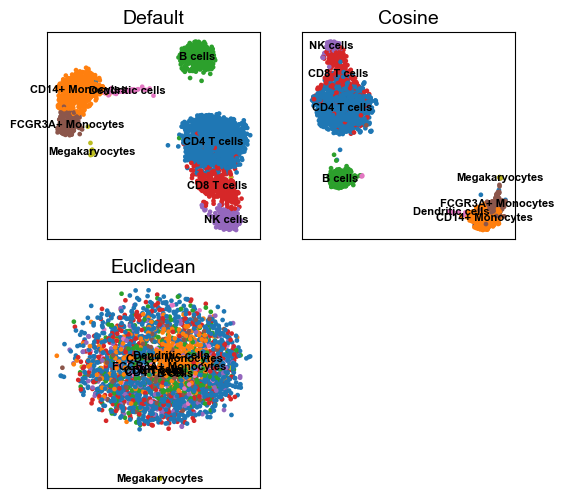

In [7]:
fig = figure(figsize=(6,6))
ax1 = fig.add_subplot(2, 2, 1)
sc.pl.embedding(adata, color='louvain', basis='umap', title='Default',  ax=ax1, show=False, 
                legend_loc='on data', legend_fontsize='xx-small')
ax2 = fig.add_subplot(2, 2, 2)
sc.pl.embedding(adata, color='louvain', basis='cos_umap', title='Cosine',  ax=ax2, show=False, 
                legend_loc='on data', legend_fontsize='xx-small')
ax3 = fig.add_subplot(2, 2, 3)
sc.pl.embedding(adata, color='louvain', basis='euc_umap', title='Euclidean',  ax=ax3, show=False, 
                legend_loc='on data', legend_fontsize='xx-small')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_xlabel('')
ax3.set_ylabel('')

plt.show()

In [8]:
# try with default n_neighbors
n_neighbors = 10
CosineU = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0, n_jobs=2, metric='cosine')
CosineU.fit(adata.X)
adata.obsm['X_cos_umap'] = CosineU.embedding_
EuclU = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0, n_jobs=2, metric='euclidean')
EuclU.fit(adata.X)
adata.obsm['X_euc_umap'] = EuclU.embedding_

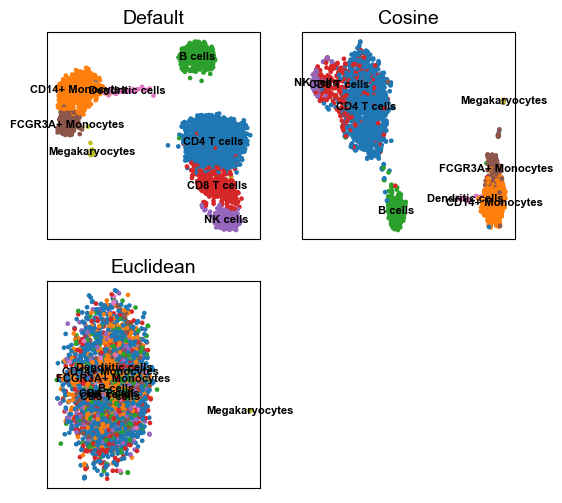

In [9]:
fig = figure(figsize=(6,6))
ax1 = fig.add_subplot(2, 2, 1)
sc.pl.embedding(adata, color='louvain', basis='umap', title='Default',  ax=ax1, show=False, 
                legend_loc='on data', legend_fontsize='xx-small')
ax2 = fig.add_subplot(2, 2, 2)
sc.pl.embedding(adata, color='louvain', basis='cos_umap', title='Cosine',  ax=ax2, show=False, 
                legend_loc='on data', legend_fontsize='xx-small')
ax3 = fig.add_subplot(2, 2, 3)
sc.pl.embedding(adata, color='louvain', basis='euc_umap', title='Euclidean',  ax=ax3, show=False, 
                legend_loc='on data', legend_fontsize='xx-small')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_xlabel('')
ax3.set_ylabel('')

plt.show()

In [10]:
print(sc.__version__)
print(umap.__version__)

1.7.1
0.5.1
